In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

In [ ]:
save_filename = "test.mp4"
pos_filename = "pos.txt"
vel_filename = "vel.txt"
acc_filename = "acc.txt"
fps = 10

In [3]:
positions = np.genfromtxt(pos_filename, dtype = float)
(T, n_drivers, ) = positions.shape

In [4]:
angle_step = 4 * np.pi / n_drivers
def x_from_rel_angle(theta):
    return np.cos(angle_step * theta)
def y_from_rel_angle(theta):
    return np.sin(angle_step * theta)

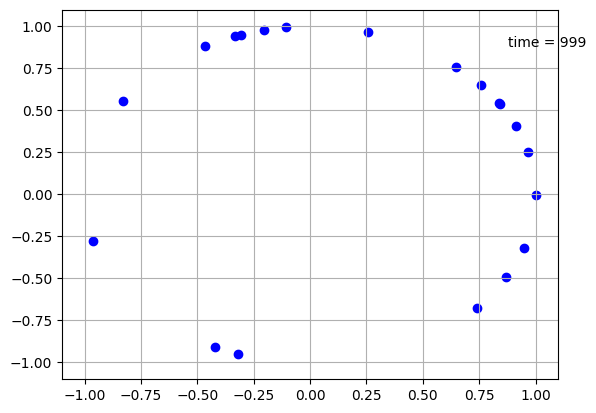

In [6]:
fig = plt.figure(6754)
ax = fig.subplots()
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)
ax.grid()
cars = ax.scatter(x_from_rel_angle(positions[0, :]), y_from_rel_angle(positions[0, :]), color="blue")
text = ax.text(0.9,0.9,"time = 0",transform=ax.transAxes)

def initConc():
    text.set_text("time = 0")
    cars.set_offsets(np.column_stack([x_from_rel_angle(positions[0, :]), y_from_rel_angle(positions[0, :])]))
    return cars, 


def animateConc(t):
    text.set_text('time = %.0f' %t)
    cars.set_offsets(np.column_stack([x_from_rel_angle(positions[t, :]), y_from_rel_angle(positions[t, :])]))
    return cars, 

ani = anim.FuncAnimation(fig,animateConc,interval=16,repeat=True,blit=True,frames=T,init_func=initConc)

ani.save(save_filename, writer=anim.FFMpegWriter(fps=fps))
plt.show()